In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scienceplots
from matplotlib.ticker import FuncFormatter

plt.style.use(['science', 'grid'])

In [2]:
folder = '../trained_feb24/'

def get_stats(folder):
    acc = np.loadtxt(os.path.join(folder, 'accuracy.txt'))
    lss = np.loadtxt(os.path.join(folder, 'loss.txt'))
    grads = None
    if os.path.exists(os.path.join(folder, 'gradFlow.txt')):
        grads = np.loadtxt(os.path.join(folder, 'gradFlow.txt'), delimiter=',')
    return acc, lss, grads

In [3]:
folders = {
    '../trained_feb24/': 'trained on full data, temporal split',
    '../trained_feb24_randsplit/': 'trained on full data, random split',
    '../trained_fold1_feb24/': 'trained per-trial, testing on fold 1',
    '../trained_fold2_feb24/': 'trained per-trial, testing on fold 2',
    '../trained_fold3_feb24/': 'trained per-trial, testing on fold 3',
    '../trained_fold4_feb24/': 'trained per-trial, testing on fold 4'
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


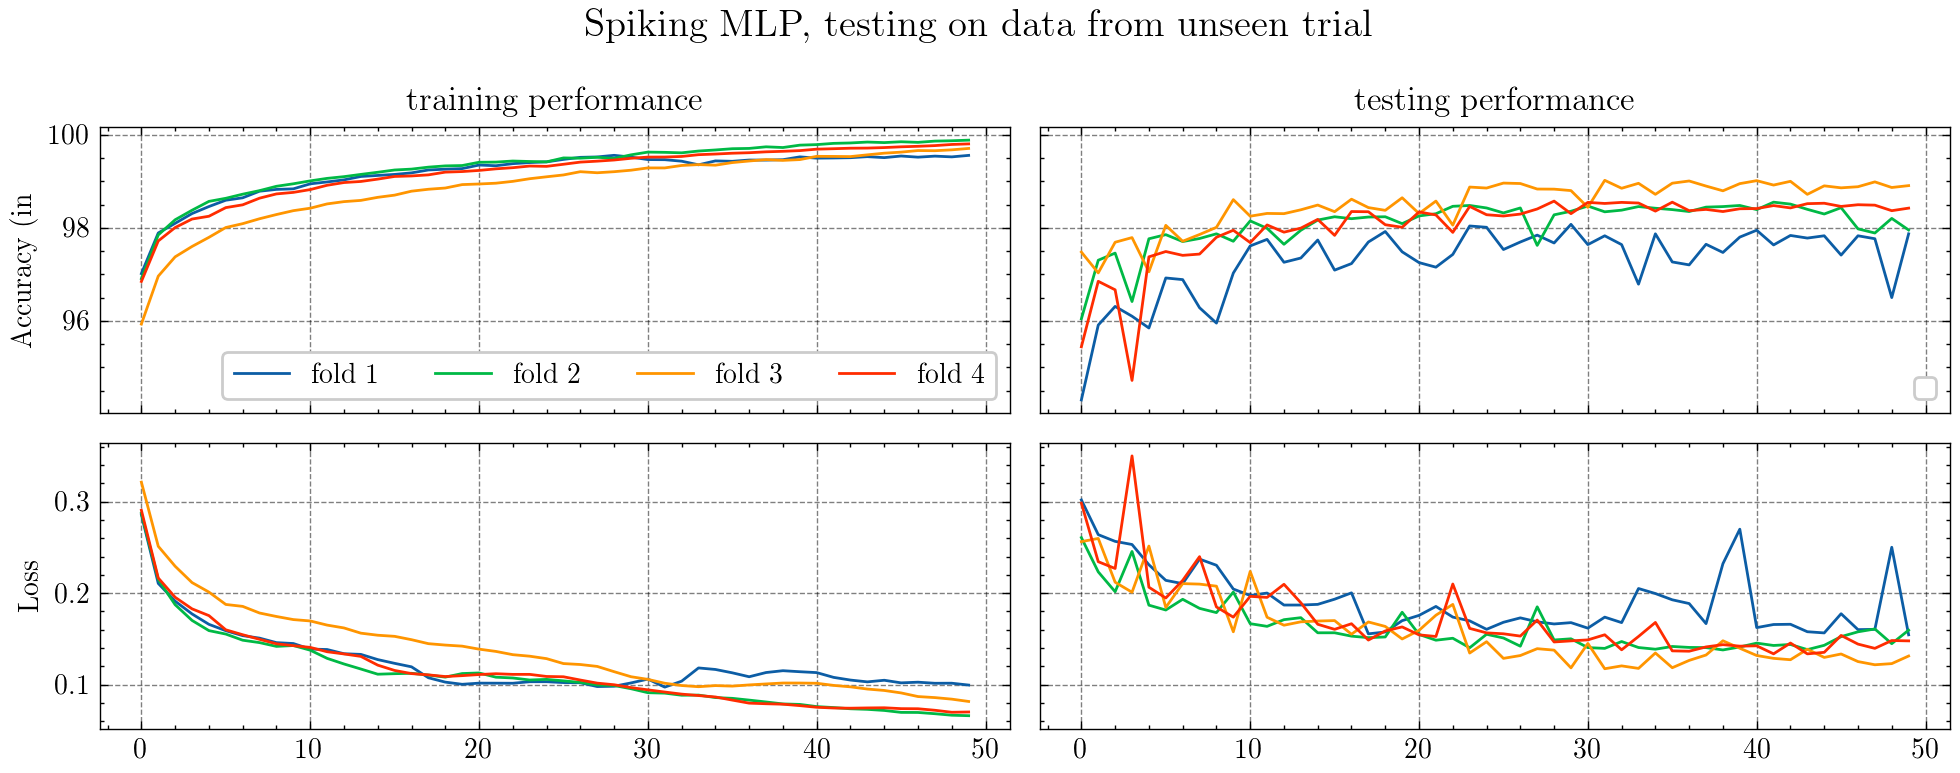

In [19]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharey='row', sharex=True, figsize=(10, 4), dpi=200)
fig.suptitle('Spiking MLP, testing on data from unseen trial', fontsize=14)
axs[0][0].set_title('training performance')
axs[0][1].set_title('testing performance')
for folder, title in [(k,v) for (k,v) in folders.items() if 'fold' in k]:
    fold_idx = folder.split('_')[-2][-1]
    acc, lss, grads = get_stats(folder)
    axs[0][0].plot(acc[:,0], label=f'fold {fold_idx}')
    axs[0][1].plot(acc[:,1], label=f'fold {fold_idx}' if fold_idx == 1 else None)
    axs[1][0].plot(lss[:,0], label=f'fold {fold_idx}')
    axs[1][1].plot(lss[:,1], label=f'fold {fold_idx}')
# axs[0][1].hlines(0.9605, 0, 50, label='linear model on frames', color='gray', linestyle='--')
# axs[0][1].hlines(0.9751, 0, 50, label='MLP on frames', color='black', linestyle='--')
axs[0][0].set_ylabel('Accuracy (in %)')
axs[0][0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axs[1][0].set_ylabel('Loss')
axs[0][1].legend(loc='lower right', ncol=2)
axs[0][0].legend(loc='lower right', ncol=4)
plt.tight_layout()
plt.show()

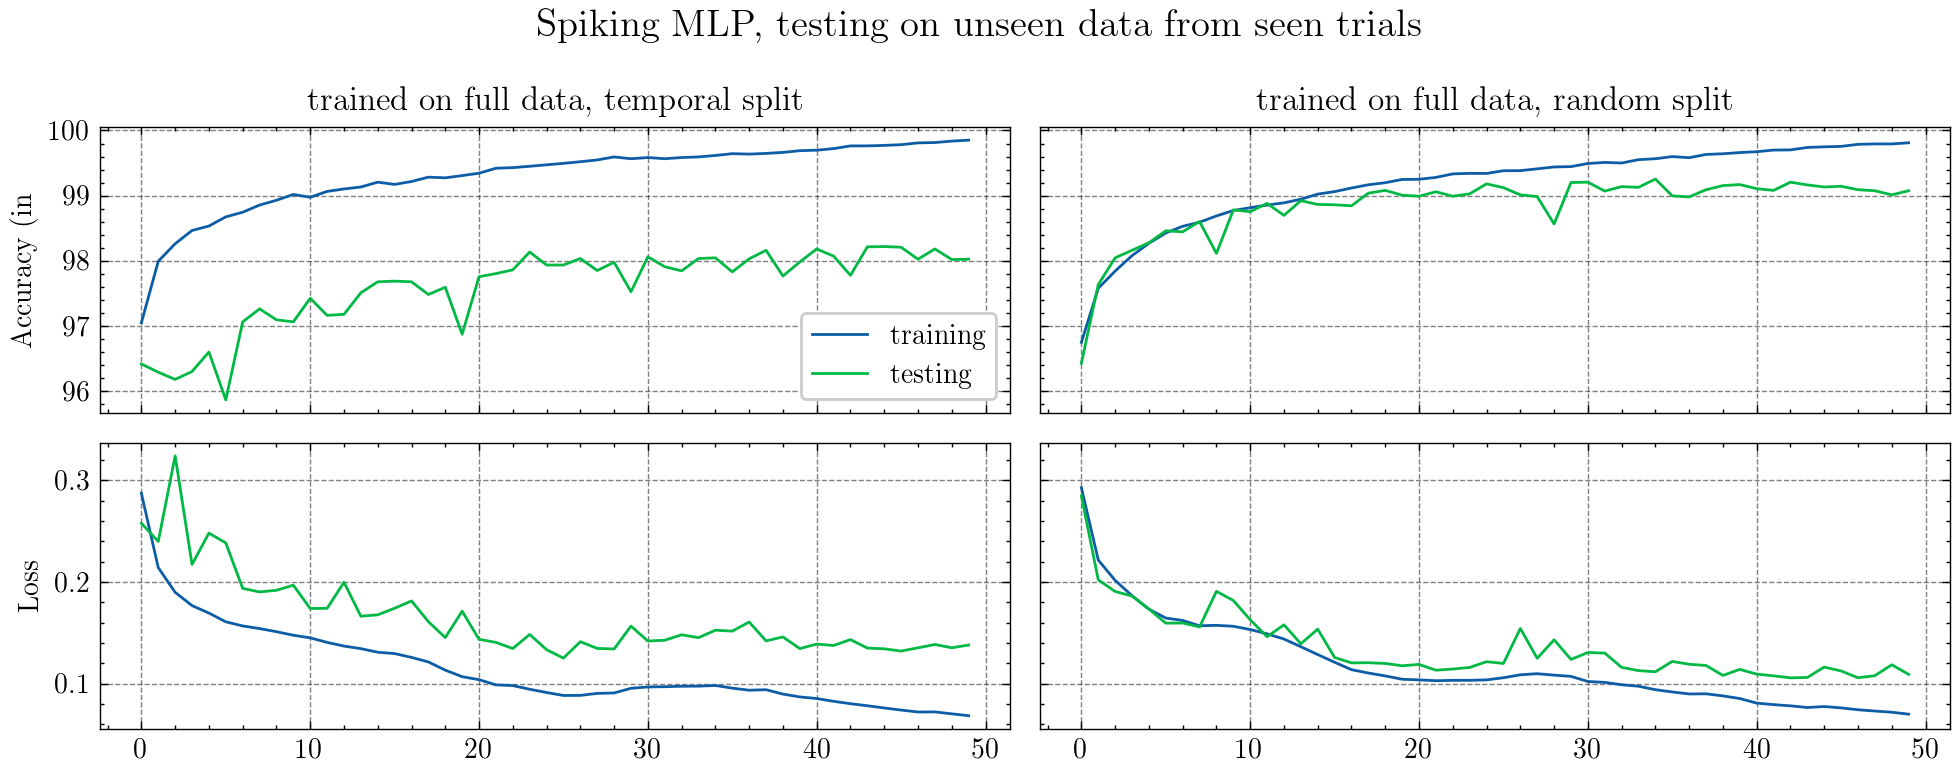

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharey='row', sharex=True, figsize=(10, 4), dpi=200)
fig.suptitle('Spiking MLP, testing on unseen data from seen trials', fontsize=14)
for idx, (folder, title) in enumerate(folders.items()):
    if 'fold' in folder:
        continue
    acc, lss, grads = get_stats(folder)
    axs[0][idx].set_title(title)
    axs[0][idx].plot(acc, label=['training', 'testing'])
    axs[1][idx].plot(lss, label=['training', 'testing'])
axs[0][0].set_ylabel('Accuracy (in %)')
axs[1][0].set_ylabel('Loss')
axs[0][0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# axs[0][0].legend(loc='lower right', ncol=2, fancybox=True, shadow=True)
axs[0][0].legend(loc='lower right')
# axs[0][1].legend(loc='center', bbox_to_anchor=(-0.3, 0.5), ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

In [13]:
# best performances
final_folds_test = []
final_folds_train = []
for idx, (folder, title) in enumerate(folders.items()):
    acc, lss, grads = get_stats(folder)
    print(f'{title}')
    print(f'final: {acc[-1,0]:.2%} training, {acc[-1,1]:.2%} testing')
    final_folds_train.append(acc[-1,0])
    final_folds_test.append(acc[-1,1])
    print(f'best:  {acc[:,0].max():.2%} training, {acc[:,1].max():.2%} testing')
    print()
final_folds_test = np.array(final_folds_test)
final_folds_train = np.array(final_folds_train)
print(f'average: {np.mean(final_folds_train):.2%} training, {np.mean(final_folds_test):.2%} testing')

trained on full data, temporal split
final: 99.85% training, 98.02% testing
best:  99.85% training, 98.22% testing

trained on full data, random split
final: 99.81% training, 99.08% testing
best:  99.81% training, 99.25% testing

trained per-trial, testing on fold 1
final: 99.56% training, 97.87% testing
best:  99.56% training, 98.07% testing

trained per-trial, testing on fold 2
final: 99.88% training, 97.95% testing
best:  99.88% training, 98.55% testing

trained per-trial, testing on fold 3
final: 99.71% training, 98.91% testing
best:  99.71% training, 99.02% testing

trained per-trial, testing on fold 4
final: 99.80% training, 98.42% testing
best:  99.80% training, 98.57% testing

average: 99.77% training, 98.38% testing
